In [ ]:
#This program is to develop a neural Network(ANN) regression model . redshift the label/target
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import  MinMaxScaler

import xgboost as xg 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE 

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Dataset/New_trainallrangeprocessed.csv")

In [ ]:
dataset.shape

(582232, 27)

In [ ]:
len(dataset)

582232

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.drop_duplicates()

,Unnamed: 0,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,z,mmug,mmgr,mmri,mmiz,mfug,mfgr,mfri,mfiz,redshift
0,0,22.70128,21.55564,20.74338,19.97239,19.65203,23.26064,22.38317,21.52284,20.75258,...,19.65203,22.128460,21.149510,20.357885,19.812210,22.821905,21.953005,21.137710,20.602890,0.679974
1,1,23.23910,21.44343,19.67306,18.94400,18.55688,23.69614,22.34922,20.59603,19.86871,...,18.55688,22.341265,20.558245,19.308530,18.750440,23.022680,21.472625,20.232370,19.659590,0.412071
2,2,24.05348,21.24721,19.39289,18.68024,18.31429,24.11929,22.13657,20.29977,19.57731,...,18.31429,22.650345,20.320050,19.036565,18.497265,23.127930,21.218170,19.938540,19.384555,0.413140
3,3,26.32478,20.74059,18.99681,18.29084,17.80812,25.19303,21.98622,20.28767,19.56692,...,17.80812,23.532685,19.868700,18.643825,18.049480,23.589625,21.136945,19.927295,19.318555,0.399193
4,4,24.76801,19.32076,17.81846,17.23835,16.92202,24.11602,20.81318,19.32606,18.72738,...,16.92202,22.044385,18.569610,17.528405,17.080185,22.464600,20.069620,19.026720,18.568060,0.253831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582227,604928,26.19360,21.84318,21.49009,21.43189,21.87856,25.30545,22.30836,21.96545,22.01373,...,21.87856,24.018390,21.666635,21.460990,21.655225,23.806905,22.136905,21.989590,22.251230,6.552610
582228,604929,21.57603,20.99160,20.63745,20.29666,19.33586,21.96664,21.43429,21.07467,20.80290,...,19.33586,21.283815,20.814525,20.467055,19.816260,21.700465,21.254480,20.938785,20.302065,6.138975
582229,604932,24.30561,23.59575,21.74487,20.60606,19.91005,24.03291,24.07756,22.41889,21.23574,...,19.91005,23.950680,22.670310,21.175465,20.258055,24.055235,23.248225,21.827315,20.866255,5.350088
582230,604933,25.70489,22.18283,21.30940,20.22876,19.21709,23.99918,23.17838,22.30052,21.11168,...,19.21709,23.943860,21.746115,20.769080,19.722925,23.588780,22.739450,21.706100,20.624625,6.964785


In [ ]:
#these columns are not required
dataset.drop(dataset.columns[dataset.columns.str.contains('Unnamed',case = False)], axis = 1,inplace=True) #dropping objid column
#dataset.drop(['zerr'], axis = 1,inplace=True) #dropping zerr column

In [ ]:
dataset[dataset["modelMag_u"]==-9999]=np.nan
dataset[dataset["modelMag_g"]==-9999]=np.nan
dataset[dataset["modelMag_r"]==-9999]=np.nan
dataset[dataset["modelMag_i"]==-9999]=np.nan
dataset[dataset["modelMag_z"]==-9999]=np.nan
dataset[dataset["fiberMag_u"]==-9999]=np.nan
dataset[dataset["fiberMag_g"]==-9999]=np.nan
dataset[dataset["fiberMag_r"]==-9999]=np.nan
dataset[dataset["fiberMag_i"]==-9999]=np.nan
dataset[dataset["fiberMag_z"]==-9999]=np.nan
dataset[dataset["petroR50_r"]==-9999]=np.nan
dataset[dataset["petroR90_r"]==-9999]=np.nan
dataset[dataset["petroR50_z"]==-9999]=np.nan
dataset[dataset["petroR90_z"]==-9999]=np.nan
dataset[dataset["mmug"]==-9999]=np.nan
dataset[dataset["mmgr"]==-9999]=np.nan
dataset[dataset["mmri"]==-9999]=np.nan
dataset[dataset["mmiz"]==-9999]=np.nan
dataset[dataset["mfug"]==-9999]=np.nan
dataset[dataset["mfgr"]==-9999]=np.nan
dataset[dataset["mfri"]==-9999]=np.nan
dataset[dataset["mfiz"]==-9999]=np.nan
dataset[dataset["r"]==-9999]=np.nan
dataset[dataset["i"]==-9999]=np.nan
dataset[dataset["z"]==-9999]=np.nan
dataset[dataset["redshift"]==-9999]=np.nan
dataset[dataset["redshift"]<0]=np.nan

In [ ]:
#Dropping null values
dataset=dataset.dropna()
dataset.shape

(582232, 26)

Text(0, 0.5, 'Number of samples')

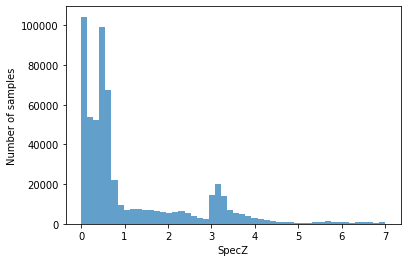

In [ ]:
#checking the data distribution
plt.hist(dataset['redshift'], bins=50, alpha=0.7)
plt.xlabel('SpecZ')
plt.ylabel('Number of samples')

In [ ]:
def getClass(value):
  if value>=0.00 and value<1.0:
    return '1'
  elif value>=1.00 and value<2.0:
    return '2'
  elif value>=2.00 and value<3.0:
    return '3'
  elif value>=3.00 and value<4.0:
    return '4'
  elif value>=4.00 and value<5.0:
    return '5'
  elif value>=5.00 and value<6.0:
    return '6'
  elif value>=6.00 and value<=7.0:
    return '7'

In [ ]:
##dataset['Class']=dataset['redshift'].apply(lambda x: cls(x))
#dataset['Class']=dataset['redshift'].apply(lambda x: 0 if x<1.0 else 1)
dataset['Class']=dataset['redshift'].apply(lambda x: getClass(x))
dataset=dataset.dropna()
dataset.shape
#dataset.loc[dataset['redshift'] >0.00 , 'Class']='A'

(582232, 27)

In [ ]:
df_1=dataset[dataset.Class=='1']
df_2=dataset[dataset.Class=='2']
df_3=dataset[dataset.Class=='3']
df_4=dataset[dataset.Class=='4']
df_5=dataset[dataset.Class=='5']
df_6=dataset[dataset.Class=='6']
df_7=dataset[dataset.Class=='7']

In [ ]:
len(df_1)

410029

In [ ]:
len(df_2)

48898

In [ ]:
len(df_3)

31496

In [ ]:
len(df_4)

71046

In [ ]:
len(df_5)

9164

In [ ]:
len(df_6)

6196

In [ ]:
len(df_7)

5403

In [ ]:
from sklearn.utils import resample
df_1=resample(df_1,replace=True,n_samples=5000,random_state=123) 
df_2=resample(df_2,replace=True,n_samples=5000,random_state=123) 
df_3=resample(df_3,replace=True,n_samples=4272,random_state=123) 
df_4=resample(df_4,replace=True,n_samples=1933,random_state=123) 
df_5=resample(df_5,replace=True,n_samples=1725,random_state=123) 
df_6=resample(df_6,replace=True,n_samples=1799,random_state=123) 
df_7=resample(df_7,replace=True,n_samples=1688,random_state=123) 
 

In [ ]:
dataset=pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7])

In [ ]:
del dataset['Class']

In [ ]:
dataset.shape

(21417, 26)

In [ ]:
#dataset['redshift']=np.log1p(dataset['redshift'])

Text(0, 0.5, 'Number of samples')

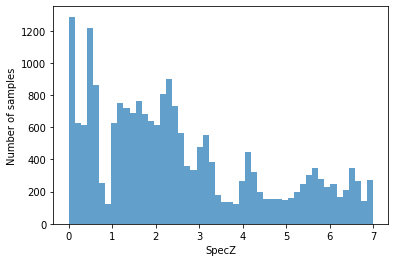

In [ ]:
#checking the data distribution
plt.hist(dataset['redshift'], bins=50, alpha=0.7)
plt.xlabel('SpecZ')
plt.ylabel('Number of samples')

In [ ]:
X=dataset.drop('redshift',axis=1)
Y=dataset['redshift']

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)
X.shape

[[0.57445566 0.60444779 0.66312305 ... 0.72798788 0.74519128 0.68927012]
 [0.47997149 0.56342928 0.74631861 ... 0.64565292 0.77035886 0.79165685]
 [0.22738573 0.21725078 0.27279365 ... 0.37373494 0.38891053 0.374726  ]
 ...
 [0.68365841 0.74494037 0.77756193 ... 0.77546718 0.79434035 0.7430403 ]
 [0.56659796 0.59165686 0.80348765 ... 0.71647562 0.86716445 0.87180977]
 [0.72171461 0.60303164 0.75821847 ... 0.61589963 0.65210768 0.65153654]]


(21417, 25)

In [ ]:
# Target vector
y = dataset['redshift']
print(y)

294715    0.573746
328638    0.314263
32834     0.078000
20586     0.478334
227144    0.624254
            ...   
572324    6.641785
579747    6.931001
581837    6.709867
573796    6.137444
579639    6.655828
Name: redshift, Length: 21417, dtype: float64


In [ ]:
y=y.to_numpy() #pd needs to convert to numpy before applying minmaxscaler
y=y.reshape(-1,1) # this is for using MinMAxscalerr
print(y.shape)

(21417, 1)


In [ ]:
scaler = MinMaxScaler()
y = scaler.fit_transform(y)
print(y)

[[0.08191684]
 [0.04484542]
 [0.01109126]
 ...
 [0.95856396]
 [0.8767838 ]
 [0.95084358]]


In [ ]:
#user dfined function for train,test and validation
def my_train_test_split(X, y, ratio_train, ratio_val, seed=42):
    idx = np.arange(X.shape[0])
    np.random.seed(seed)
    np.random.shuffle(idx)

    limit_train = int(ratio_train * X.shape[0])
    limit_val = int((ratio_train + ratio_val) * X.shape[0])

    idx_train = idx[:limit_train]
    idx_val = idx[limit_train:limit_val]
    idx_test = idx[limit_val:]

    X_train, y_train = X[idx_train], y[idx_train]
    X_val, y_val = X[idx_val], y[idx_val]
    X_test, y_test = X[idx_test], y[idx_test]

    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = my_train_test_split(X, y, .75,.15,seed=42)

In [ ]:
print('# Train/Test = %s' %len(pd.merge(pd.DataFrame(X_train), pd.DataFrame(X_test), how='inner')))

# Train/Test = 246


In [ ]:
y_train=y_train.ravel()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.linalg import pinv2
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
import numpy as np
import time

def _eliot(x):
  return (1/2+((x/2)/(1+abs(x))))

def _mean_squared_error(y, pred):
    return 0.5 * np.mean((y - pred) ** 2)


def _mean_abs_error(y, pred):
    return np.mean(np.abs(y, pred))


def _sigmoid(x):
    return 1. / (1. + np.exp(-x))

def _linear(x):
    return x


def _fourier(x):
    return np.sin(x)


def _hardlimit(x):
    return (x >= 0).astype(int)


def _identity(x):
    return x



def getActivation(name):
    return {
        'sigmoid': _sigmoid,
        'fourier': _fourier,
        'hardlimit': _hardlimit,
        'eliot':_eliot
    }[name]


def getLoss(name):
    return {
        'mse': _mean_squared_error,
        'mae': _mean_abs_error
    }[name]


class ELM:
    def __init__(self, num_input_nodes, num_hidden_units, num_out_units, activation='sigmoid',
                 loss='mse', beta_init=None, w_init=None, bias_init=None):
        self._num_input_nodes = num_input_nodes
        self._num_hidden_units = num_hidden_units
        self._num_out_units = num_out_units

        self._activation = getActivation(activation)
        self._loss = getLoss(loss)

        if isinstance(beta_init, np.ndarray):
            self._beta = beta_init
        else:
            self._beta = np.random.uniform(-1., 1., size=(self._num_hidden_units, self._num_out_units))

        if isinstance(w_init, np.ndarray):
            self._w = w_init
        else:
            self._w = np.random.uniform(-1, 1, size=(self._num_input_nodes, self._num_hidden_units))

        if isinstance(bias_init, np.ndarray):
            self._bias = bias_init
        else:
            self._bias = np.zeros(shape=(self._num_hidden_units,))

        print('Bias shape:', self._bias.shape)
        print('W shape:', self._w.shape)
        print('Beta shape:', self._beta.shape)

    def fit(self, X, Y, display_time=False):
        H = self._activation(X.dot(self._w) + self._bias)

        # Moore–Penrose pseudo inverse
        if display_time:
            start = time.time()
        H_pinv = np.linalg.pinv(H)
        if display_time:
            stop = time.time()
            print(f'Train time: {stop-start}')

        self._beta = H_pinv.dot(Y)

        # print('Fit Beta shape:', self._beta.shape)

    def __call__(self, X):
        H = self._activation(X.dot(self._w) + self._bias)
        return H.dot(self._beta)

    def _mean_squared_error(y, pred):
        return 0.5 * np.mean((y - pred) ** 2)

    def evaluate(self, X, y_test):
        pred = self(X)

        # Loss (base on model setting)
        #loss = self._loss(y_test, pred)
        #loss=_mean_squared_error(y_test,pred)
        #var = metrics.explained_variance_score(y_test, pred)
        #mae = metrics.mean_absolute_error(y_test, pred)
       # mse = metrics.mean_squared_error(y_test, pred)
       # r2 = metrics.r2_score(y_test, pred)
       # rmse = sqrt(mean_squared_error(y_test, pred))
  
       # y_test=pd.DataFrame(y_test)
       # pred=pd.DataFrame(pred)
       # outl=pred[abs(y_test-pred)>0.1]
       # outl=outl.dropna()
       # out=outl.shape[0]*100.0/y_test.shape[0]
       # rms=np.sqrt(np.mean((y_test-pred)**2))
       # rmsout=np.sqrt(np.mean(((y_test-pred)[abs(y_test-pred)<0.1])**2))
       # bias=np.mean(y_test-pred)
      #  biasmedian=np.median(y_test-pred)
      #  delta_znorm=abs((y_test-pred)-np.median(pred-y_test)/(1+y_test))
      #  NMAD=1.48*np.median(delta_znorm)
        # Accuracy
       # acc = np.sum(np.argmax(pred, axis=-1) == np.argmax(Y, axis=-1)) / len(Y)

        # Unweighted Average Recall
        # TODO

        return pred

In [ ]:
num_hidden_layers=512
num_classes=1
model = ELM(
      25,
      num_hidden_layers,
      num_classes,
      activation='eliot',
      w_init=25
  )
   

Bias shape: (512,)
W shape: (25, 512)
Beta shape: (512, 1)


In [ ]:
model.fit(X_train, y_train)


In [ ]:
y_pred_tree= model.evaluate(X_test, y_test)
#print('val loss: %f' % val_loss)

In [ ]:
#print("MSE",mse)
#print("MAE",mae)
#print("OUTL",outl)
#print("R2",r2)
#print("NMAD",nmad)

In [ ]:
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error
var = metrics.explained_variance_score(y_test, y_pred_tree)
mae = metrics.mean_absolute_error(y_test, y_pred_tree)
mse = metrics.mean_squared_error(y_test, y_pred_tree)
r2 = metrics.r2_score(y_test, y_pred_tree)
rmse = sqrt(mean_squared_error(y_test, y_pred_tree))
print ('Explained variance (best possible score is 1.0, lower values are worse):', var)
print ('Mean Absolute Error (best is 0.0):', mae)
print ('Mean Squared Error (best is 0.0):', mse)
print ('R2 score (best is 1.0):', r2)
print ('root Mean Squared Error (best is 0.0):', rmse)


Explained variance (best possible score is 1.0, lower values are worse): -236.83823665896477
Mean Absolute Error (best is 0.0): 0.26169858894106857
Mean Squared Error (best is 0.0): 18.767106435912083
R2 score (best is 1.0): -236.97364152668328
root Mean Squared Error (best is 0.0): 4.332101849669751


In [ ]:
y_test_tree=y_test
y_test_tree=pd.DataFrame(y_test_tree)
y_pred_tree=pd.DataFrame(y_pred_tree)
outl=y_pred_tree[abs(y_test_tree-y_pred_tree)>0.1]
outl=outl.dropna()
print('Catastropic Outliers: ', outl.shape[0]*100.0/y_test.shape[0],'%')
print('Total rms: ', np.sqrt(np.mean((y_test_tree-y_pred_tree)**2)))
print('rms w/o outliers', np.sqrt(np.mean(((y_test_tree-y_pred_tree)[abs(y_test_tree-y_pred_tree)<0.1])**2)))
print('Bias: ', np.mean(y_test_tree-y_pred_tree))
print('Bias(median value of delta z):', np.median(y_test_tree-y_pred_tree))
plt.show()

delta_znorm=abs((y_test_tree-y_pred_tree)-np.median(y_pred_tree-y_test_tree)/(1+y_test_tree))
NMAD=1.48*np.median(delta_znorm)
print('NMAD: ', NMAD)

Catastropic Outliers:  48.27264239028945 %
Total rms:  0    4.332102
dtype: float64
rms w/o outliers 0    0.047563
dtype: float64
Bias:  0   -0.103336
dtype: float64
Bias(median value of delta z): -0.023958058376696602
NMAD:  0.15368766216184884


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in expm1
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Predicted')

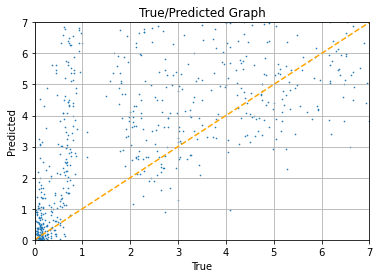

In [ ]:
import matplotlib.pyplot as plt 
#y_pred_tree=np.expm1( y_pred_tree)
y_pred_tree=np.expm1(scaler.inverse_transform(y_pred_tree))
y_test_tree=np.expm1(scaler.inverse_transform(y_test_tree))
plt.scatter(y_test_tree[:582232], y_pred_tree[:582232], s=0.4)
plt.plot(np.linspace(0,7,7), np.linspace(0,7,7), c = 'orange', linestyle='--')
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.title('True/Predicted Graph') 
plt.grid(True) 
plt.xlabel("True") 
plt.ylabel('Predicted')